# AdaBoost

Adaboost Attributes.
- estimators: The list of classifiers provided to be fit into the model.
- classes: The class labels.
- estimator_weights_: The weight assigned to each base estimator.
- estimator_errors_: Classification error for each estimator in the boosted ensemble.
- feature_importance_: Shows us which column has more importance than the other.

In [22]:
import sys
!{sys.executable} -m pip install numpy missingpy pandas matplotlib scikit-learn | grep -v 'already satisfied'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#import miceforest as mf
#from missingpy import MissForest
#from missingpy import MissForest


%matplotlib inline 


Defaulting to user installation because normal site-packages is not writeable
distutils: /home/re34/.local/lib/python3.9/site-packages
sysconfig: /home/re34/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [4]:
# Read in the dataset
df = pd.read_csv("/home/re34/Documents/ID5059/P2/ID5059-P2/train.csv");
# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)
df_safe = df.copy()

In [6]:
M = df.shape[1]
N = df.shape[0]
X_train = df.iloc[:,:M-1]
names = df.columns
y_train = df.iloc[:,M-1]

# Fit initial classifier: a stump
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=123)
tree_clf.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=1, random_state=123)

In [7]:
# Fit AdaBoost model:
adaboost_clf = AdaBoostClassifier(tree_clf, n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=123),
                   learning_rate=0.5, n_estimators=200, random_state=42)

/home/re34/.local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Decis

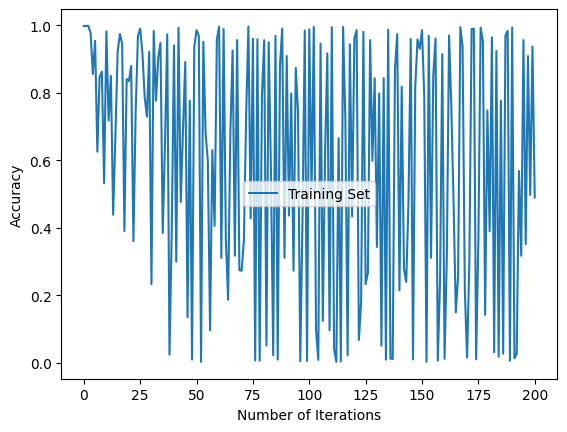

In [8]:
# Get the training (and test) set accuracies for each iteration
train_acc = [adaboost_clf.score(X_train, y_train)]
#test_acc = [adaboost_clf.score(X_test, y_test)]
for clf in adaboost_clf:
    train_acc.append(clf.score(X_train, y_train))
    #test_acc.append(clf.score(X_test, y_test))

# Plot the accuracies against the number of iterations
plt.plot(train_acc, label='Training Set')
#plt.plot(test_acc, label='Test Set')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

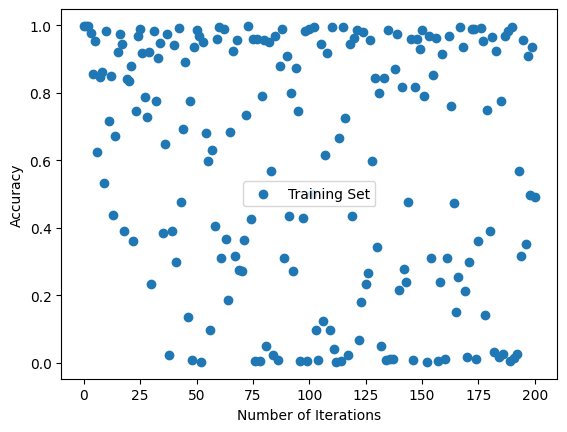

In [9]:
# Plot the accuracies against the number of iterations
plt.scatter(list(range(len(train_acc))), train_acc, label='Training Set')
#plt.plot(test_acc, label='Test Set')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
%%capture

# plot the ROC curve alongside diagonal line representing a random classifier
# DO ON TEST DATA?

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Predict class probabilities for the train set
y_pred_prob = adaboost_clf.predict_proba(X_train)[:, 1]
# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
# Calculate the AUC score - (Area Under the Curve) measures the performance of our binary classifier
auc_score = roc_auc_score(y_train, y_pred_prob)

# find closest distance to (0,1) - the optimal classifier - obtain this optimal threshold
distances = np.sqrt(fpr ** 2 + (tpr - 1) ** 2)
optimal_threshold_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_threshold_idx]

# Calculate FPR and TPR for this optimal threshold
fpr_opt = fpr[np.argmax(tpr - fpr)]
tpr_opt = tpr[np.argmax(tpr - fpr)]


# Plot the ROC curve (Receiver Operating Characteristic)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
# location of optimum threshold
plt.scatter(fpr_opt, tpr_opt, marker='o', color='red', label= f'Optimal threshold = {optimal_threshold}')
# diagonal line - random clf
plt.plot([0, 1], [0, 1], 'k--', label='Represents a random classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - plot of the TPR against the FPR at various classification thresholds')
plt.legend(loc="lower right")
plt.show()

In [11]:
%%capture
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

y_score = y_pred_prob
AP = average_precision_score(y_train, y_score)

# plot our precision-recall curve
prec, recall, _ = precision_recall_curve(y_train, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

# optimal point??????? Equal Error Rate EER - where precision = recall:


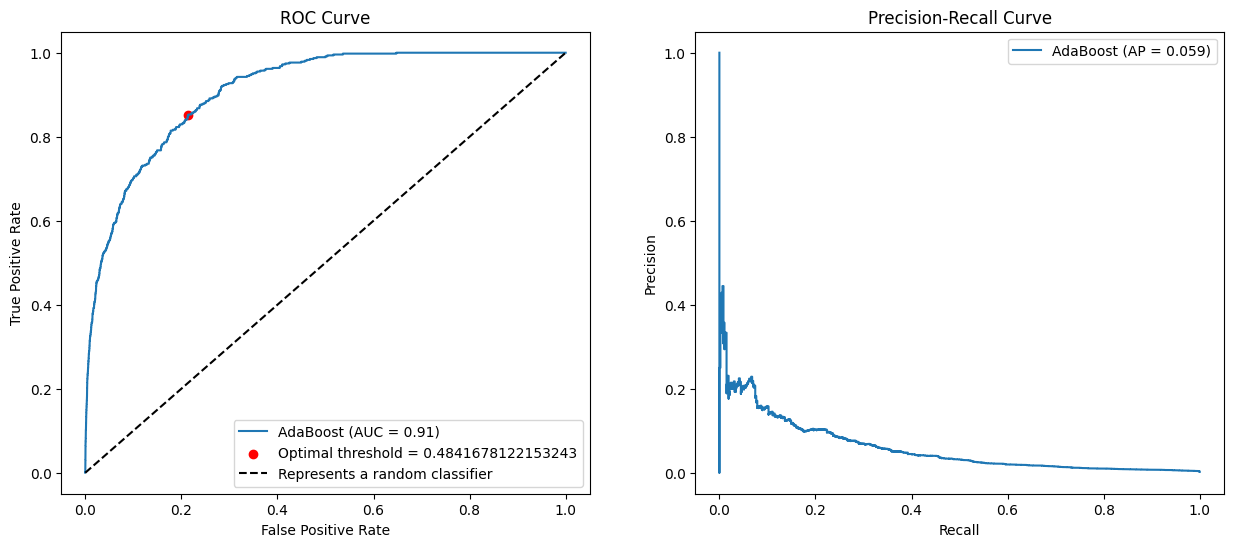

In [12]:

# Side by side plots of ROC curve and Precision-Recall Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Plot the ROC curve (Receiver Operating Characteristic)
roc_display.plot(ax=ax1,label='AdaBoost (AUC = %0.2f)' % auc_score)    
# location of optimum threshold
ax1.scatter(fpr_opt, tpr_opt, marker='o', color='red', label= f'Optimal threshold = {optimal_threshold}')
# diagonal line - random clf
ax1.plot([0, 1], [0, 1], 'k--', label='Represents a random classifier')

ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")


# Plot the Precision-Recall Curve
pr_display.plot(ax=ax2, label='AdaBoost (AP = %0.3f)' % AP)

ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="upper right")

plt.show()

ROC Curve
- This demonstrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) at different thresholds. 
- The AUC score summarizes this trade-off into a single value, providing a useful metric for comparing the performance of different classifiers and for selecting the best threshold for a particular application: detecting fraud. 
- A perfect classifier has an AUC score of 1.0, while a completely random classifier has an AUC score of 0.5.

- The AUC score provides a useful metric for comparing the performance of different classifiers and for selecting the best threshold for a particular application. 
- It is particularly useful in our case where the distribution of positive and negative examples in the data is imbalanced (many more 0s than 1s), as it is less sensitive to changes in the classification threshold than metrics such as accuracy or precision.

Recall-Precision Curve
- This demonstrates the trade-off between precision (Tp/P) and recall (Tp/T) at different classification thresholds'
- Precision-Recall is another useful measure of success of prediction when the classes are very imbalanced.
- Shows a low overall recall relating to a high FNR

These quantities are also related to the $F_1$ score, which is defined as the harmonic mean of precision and recall.


In [13]:
#The F1 score measures the trade-off between precision and recall
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# Calculate F1 score for TRAIN set
y_train_pred = adaboost_clf.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
print(accuracy_score(y_train, y_train_pred));
print(train_f1)

0.9977593107256456
0.03536345776031434


In [16]:
# MSE for predicting with & without the optimum threshold:
y_train_pred = adaboost_clf.predict(X_train)
y_train_pred_th = adaboost_clf.predict_proba(X_train)[:, 1] > 0.4945

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_train, y_train_pred_th)
# does the larger error on training set relect less overfitting - better generalisation?
#abs(y_train-y_train_pred).describe(), abs(y_train-y_train_pred_th).describe()


(0.0022406892743543757, 0.0035732376819133933)

In [17]:
# number of positives:
sum(y_train), sum(y_train_pred), sum(y_train_pred_th)
# models are both way off: 10x smaller, 100x bigger

(469, 40, 428)

In [18]:
# Using the optimal threshold explicitly with our adaboost model to predict the classes 0,1

# get predicted probabilities for the test set
y_probs = adaboost_clf.predict_proba(X_train)[:,1]

# obtain the optimal threshold (optimal threshold probability of which binary class to predict)...
# then apply the threshold to get predicted classes
y_train_pred_th = (y_probs >= optimal_threshold).astype(int)

Consider the use of our model => would we want to be overcautious about Fraud (better safe than sorry) or rather undercautious to not waste time and resources on false positives.

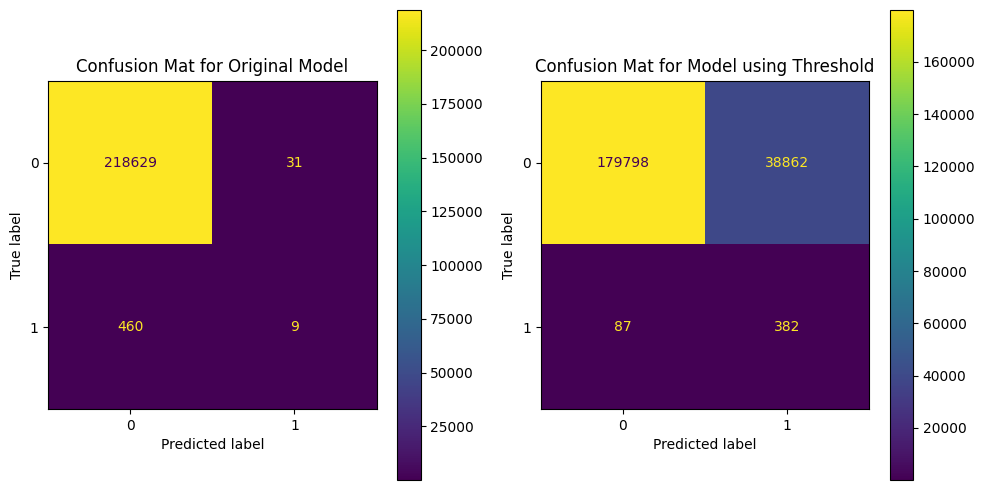

In [19]:
# comapre using confusion matrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Side by side confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

cm = confusion_matrix(y_train,y_train_pred)
cm_th = confusion_matrix(y_train,y_train_pred_th)

cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax1)
ax1.set_title('Confusion Mat for Original Model')
cm_display_th = ConfusionMatrixDisplay(cm_th).plot(ax=ax2)
ax2.set_title('Confusion Mat for Model using Threshold')
fig.tight_layout()
plt.show()


- Do the same, but with a radial basis SVM as the base classifer
- Varying the learning rate varies the convergence to a boosted predictor

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
K = 3 # small to redcue computational time

# Quick way to analyse performance of a model similar to in the lectures

def display_scores(scores):
    print("Scores:", np.round(scores))
    print("Mean:", np.round(scores.mean()), "(",np.round(100*(scores.mean()/prices.mean())), "%)")
    print("Standard deviation:", np.round(scores.std()), "(",np.round(100*(scores.std()/prices.mean())), "%)")

In [24]:
# Using GridSearch() to directly compare the accuracy of models with varying hyperparamters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'base_estimator__max_depth': [1],
            'n_estimators': [50, 150, 250],
            'learning_rate': [0.1, 0.4, 0.7]
}

# Create a decision tree stump to use as the base estimator
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=123)

# Create the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=tree_clf, random_state=123)

# Create a GridSearchCV object with the specified parameters, roc_auc
grid_search = GridSearchCV(adaboost_clf, param_grid, scoring='roc_auc', cv=3, return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

grid_search_results = grid_search.cv_results_



/home/re34/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/re34/.local/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/re34/.local/li

In [25]:
# Print the best parameters and the corresponding score

print("Best parameters from gridsearch: {}".format(grid_search.best_params_))
print("Best CV score=%0.4f" % grid_search.best_score_)


print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)


# summarize all scores that were evaluated
means = grid_search_results['mean_test_score']
stds = grid_search_results['std_test_score']
params = grid_search_results['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best parameters from gridsearch: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 150}
Best CV score=0.8115
Best parameters: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 150}
Best F1 score: 0.8115030879474222
0.800103 (0.016784) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 50}
0.811503 (0.010359) with: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 150}


In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([  52.69198036,   84.57300377,  123.69793208,  600.45840096,
        1546.59146706,  884.42226124,   43.19884872,  789.79141672,
        4206.6952618 ,  979.1728127 ,  680.95158935,  122.42268395]),
 'std_fit_time': array([4.13373532e+00, 2.69019531e+00, 3.73489295e+00, 4.22899333e+02,
        1.11401940e+03, 1.07197570e+03, 2.21998032e-01, 4.35304481e+02,
        7.15342781e+02, 1.22621792e+03, 5.76463697e+02, 1.10353947e+00]),
 'mean_score_time': array([0.8320659 , 1.32256087, 1.98514883, 0.65466626, 1.42751384,
        1.98858198, 0.70109264, 1.45078762, 2.0299139 , 0.66785558,
        1.42075165, 2.00013463]),
 'std_score_time': array([0.15007424, 0.01253549, 0.02275259, 0.05210106, 0.20710376,
        0.06244369, 0.00056668, 0.16764707, 0.02584028, 0.04501927,
        0.20482258, 0.01945707]),
 'param_base_estimator__max_depth': masked_array(data=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False

In [ ]:
means = grid_search_results['mean_test_score']
stds = grid_search_results['std_test_score']
params = grid_search_results['params']
means

array([0.6661875 , 0.66620119, 0.67234369, 0.66618293, 0.6661875 ,
       0.66729643, 0.6661875 , 0.66616924, 0.66614643, 0.71073203,
       0.71573822, 0.71573822])

In [ ]:
means = grid_search_results['mean_test_score']
stds = grid_search_results['std_test_score']
params = grid_search_results['params']
means

n_estimators = [50,100,150]
learning_rate = [0.1,0.5,1.0,2.0]
means = means.reshape(len(learning_rate),len(n_estimators))
means = pd.DataFrame(means, index=learning_rate, columns=n_estimators)
means.iloc[:,0]


0.1    0.666187
0.5    0.666183
1.0    0.666187
2.0    0.710732
Name: 50, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

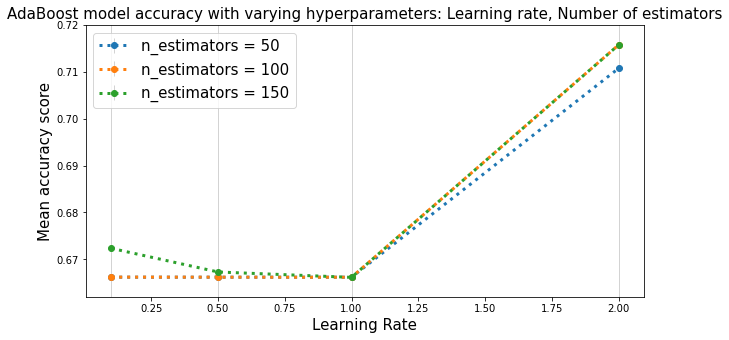

In [ ]:

#accuracy error plot to visualize the the cross validation grid search results
means = grid_search_results['mean_test_score']
stds = grid_search_results['std_test_score']
params = grid_search_results['params']

# rows correspond to learning rate, columns correspond to n_estimators
n_estimators = [50,100,150]
learning_rate = [0.1,0.5,1.0,2.0]
means = means.reshape(len(learning_rate),len(n_estimators))
means = pd.DataFrame(means, index=learning_rate, columns=n_estimators)
stds = stds.reshape(len(learning_rate),len(n_estimators))
stds = pd.DataFrame(stds, index=learning_rate, columns=n_estimators)


fig = plt.figure(figsize=(10,5))
#for i in range(means.shape[1]):

plt.errorbar(learning_rate, means.iloc[:,0], yerr = stds.iloc[:,0], elinewidth=1, ecolor='lightgrey',
        marker='o', alpha=1, lw=3, linestyle = 'dotted', label=f'n_estimators = {n_estimators[0]}')
plt.errorbar(learning_rate, means.iloc[:,1], yerr = stds.iloc[:,1],  elinewidth=1,ecolor='lightgrey',
        marker='o',alpha=1, lw=3, linestyle = 'dotted', label=f'n_estimators = {n_estimators[1]}')
plt.errorbar(learning_rate, means.iloc[:,2], yerr = stds.iloc[:,2],  elinewidth=1,ecolor='lightgrey',
        marker='o',alpha=1, lw=3, linestyle = 'dotted', label=f'n_estimators = {n_estimators[2]}')

plt.title('AdaBoost model accuracy with varying hyperparameters: Learning rate, Number of estimators',
            fontsize=15)
plt.ylim(0.662,0.72)
plt.ylabel('Mean accuracy score',fontsize=15)
plt.xlabel('Learning Rate',fontsize=15)
plt.legend(fontsize=15)
plt.show

In [ ]:
from sklearn import svm

svc = svm.SVC()

In [ ]:
means = grid_search_results['mean_test_score']
stds = grid_search_results['std_test_score']
params = grid_search_results['params']


In [ ]:
means = np.array([0.6661875 , 0.66620119, 0.67234369, 0.66618293, 0.6661875 ,
       0.66729643, 0.6661875 , 0.66616924, 0.66614643, 0.71073203,
       0.71573822, 0.71573822])

In [ ]:
stds = np.array([0.46906179, 0.46904243, 0.46035562, 0.46905857, 0.46906179,
       0.46748384, 0.46906179, 0.46904889, 0.46903275, 0.40347466,
       0.39657844, 0.39657844])

In [82]:
# try max depth = 1, learning rate = 2, n est = 100
#threshold 0.4945

ada_final = AdaBoostClassifier(tree_clf, n_estimators=100, learning_rate=2, algorithm="SAMME.R", random_state=123);
ada_final.fit(X_train, y_train);
y_train_pred = ada_final.predict(X_train);
y_pred_thresh = ada_final.predict_proba(X_train)[:,1] > 0.4945



